## Libraries Importing

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Convolution2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Flatten,Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

## Paths

In [3]:
TRAIN_PATH  = 'Train_Test/train'
TEST_PATH  = 'Train_Test/test'
IMG_SIZE = 256

## Train Data Preparation

In [4]:
categories=os.listdir(TRAIN_PATH)
print('Categories Name :' ,categories)
labels=[i for i in range(len(categories))]
print('After convert it to 0,1,2 :',labels)

Categories Name : ['no', 'yes']
After convert it to 0,1,2 : [0, 1]


In [5]:
label_dict=dict(zip(categories,labels))
print(label_dict)
print('len of Labels dictionary : ' , len(label_dict))

{'no': 0, 'yes': 1}
len of Labels dictionary :  2


## Collecting Training images and Labels

In [6]:
Imges_Data_Train=[]
target_Train=[]


for  i in categories :
    path_Cat=os.path.join(TRAIN_PATH,i)
    print('Path Now is :', path_Cat)
    Img_Names=os.listdir(path_Cat)
    print(Img_Names[0:10])
    
    for img in Img_Names :
        img_path=os.path.join(path_Cat,img)
        imge=cv2.imread(img_path)
        gray_img=cv2.cvtColor(imge,cv2.COLOR_BGR2GRAY)           
        dim=(IMG_SIZE,IMG_SIZE)
        resized_img = cv2.resize(gray_img, dim)
        Imges_Data_Train.append(resized_img)
        target_Train.append(label_dict[i])

Path Now is : Train_Test/train/no
['30 no.jpg', '22 no.jpg', '41 no.jpg', '14 no.jpg', 'no 10.jpg', '18 no.jpg', 'no 9.png', 'no 7.jpeg', 'no 8.jpg', '3 no.jpg']
Path Now is : Train_Test/train/yes
['Y157.JPG', 'Y6.jpg', 'Y180.jpg', 'Y90.jpg', 'Y47.JPG', 'Y53.jpg', 'Y52.jpg', 'Y46.jpg', 'Y91.jpg', 'Y85.JPG']


In [7]:
print(target_Train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Data Normalization and Reshaping

In [8]:
Imges_Data_Train=np.array(Imges_Data_Train)/255.0
Imges_Data_Train=np.reshape(Imges_Data_Train,(Imges_Data_Train.shape[0],IMG_SIZE,IMG_SIZE,1))

In [9]:
target_Train=np.array(target_Train)

## Class Size Setting

In [10]:
Target_Train=to_categorical(target_Train)
print(Target_Train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

## Test Data preparation

In [11]:
categories=os.listdir(TEST_PATH)
print('Categories Name :' ,categories)
labels=[i for i in range(len(categories))]
print('After convert it to 0,1 :',labels)

Categories Name : ['no', 'yes']
After convert it to 0,1 : [0, 1]


In [12]:
label_dict=dict(zip(categories,labels))
print(label_dict)
print('len of Labels dictionary : ' , len(label_dict))

{'no': 0, 'yes': 1}
len of Labels dictionary :  2


In [13]:
Imges_Data_Test=[]
target_Test=[]

for  i in categories :
    path_Cat=os.path.join(TEST_PATH,i)
    print('Path Now is :', path_Cat)
    Img_Names=os.listdir(path_Cat)
    print(Img_Names[0:10])
    
    for img in Img_Names :
        img_path=os.path.join(path_Cat,img)
        imge=cv2.imread(img_path)
        gray_img=cv2.cvtColor(imge,cv2.COLOR_BGR2GRAY)           
        dim=(IMG_SIZE,IMG_SIZE)
        resized_img = cv2.resize(gray_img, dim)
        Imges_Data_Test.append(resized_img)
        target_Test.append(label_dict[i])

Path Now is : Train_Test/test/no
['no.jpg', 'no 99.jpg', 'no 98.jpg', 'No11.jpg', 'No13.jpg', 'No12.jpg', 'No16.jpg', 'no 923.jpg', 'No17.jpg', 'no 100.jpg']
Path Now is : Train_Test/test/yes
['Y194.jpg', 'Y195.JPG', 'Y192.JPG', 'Y193.JPG', 'Y242.JPG', 'Y256.JPG', 'Y257.jpg', 'Y243.JPG', 'Y255.JPG', 'Y254.jpg']


In [14]:
print(target_Test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Visualization

### pie-chart

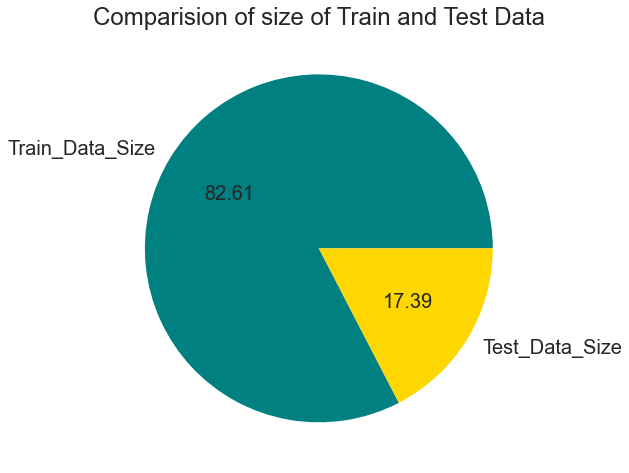

In [15]:
plt.figure(figsize=(8,8))
plt.rcParams.update({"font.size":20})
pie_data=[len(target_Train),len(target_Test)]
labels=["Train_Data_Size","Test_Data_Size"]
colors=["teal","gold"]
plt.pie(x=pie_data,labels=labels,colors=colors,autopct="%.2f")
plt.title("Comparision of size of Train and Test Data")
plt.show()

### Images from Classes

In [16]:
tumor_no  = 'Train_Test/train/no'
tumor_yes  = 'Train_Test/train/yes/'

In [17]:
dirlist=[tumor_no, tumor_yes]
filepaths=[]
for i in dirlist:
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)

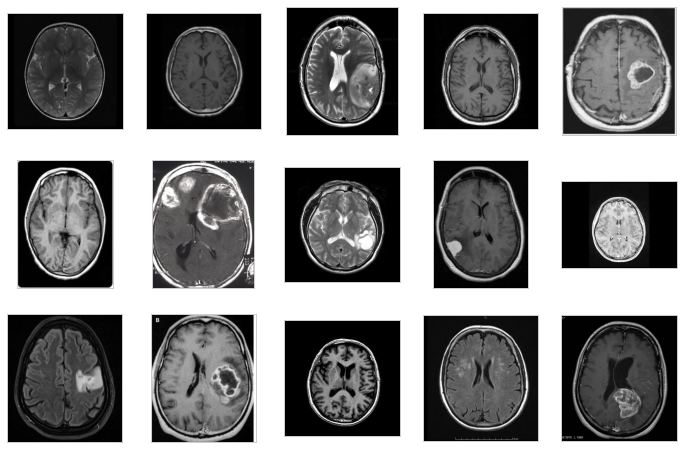

In [18]:
plt.figure(figsize=(12,8))
for i in range(15):
    random = np.random.randint(1,len(filepaths))
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.imread(filepaths[random]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Data Normaization and Reshaping

In [19]:
Imges_Data_Test=np.array(Imges_Data_Test)/255.0
Imges_Data_Test=np.reshape(Imges_Data_Test,(Imges_Data_Test.shape[0],IMG_SIZE,IMG_SIZE,1))

In [20]:
target_Test=np.array(target_Test)

## Class Size Setting

In [21]:
Target_Test=to_categorical(target_Test)
print(Target_Test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## CNN(convolutional Neural Network)

In [22]:
model = Sequential()

2022-03-15 11:06:42.226540: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.add(Conv2D(64, (5,5), activation='relu', padding='same', input_shape=(256, 256, 1))) #extract features
model.add(MaxPooling2D(pool_size=(2, 2))) #reduce the number of parameters when the images are too large
model.add(Conv2D(32, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5,5), activation='relu'))
model.add(Dropout(0.25)) #prevents overfitting
model.add(Flatten())#matrix is converted into one dimension
model.add(Dense(1024, activation="relu")) 
model.add(Dropout(0.25))
model.add(Dense(2, activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        12816     
                                                                 
 dropout (Dropout)           (None, 60, 60, 16)        0

In [25]:
adam = Adam(lr=0.0001, decay=1e-06) #reduces step size
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

## Model Building

In [26]:
history=model.fit(Imges_Data_Train,Target_Train,epochs=10,validation_data=(Imges_Data_Test,Target_Test))

Epoch 1/10
7/7 [==============================] - 20s 3s/step - loss: 0.6025 - accuracy: 0.6842 - val_loss: 0.5322 - val_accuracy: 0.8409
Epoch 2/10
7/7 [==============================] - 16s 2s/step - loss: 0.4825 - accuracy: 0.7703 - val_loss: 0.4449 - val_accuracy: 0.8636
Epoch 3/10
7/7 [==============================] - 15s 2s/step - loss: 0.4142 - accuracy: 0.8325 - val_loss: 0.4199 - val_accuracy: 0.8864
Epoch 4/10
7/7 [==============================] - 16s 2s/step - loss: 0.3500 - accuracy: 0.8517 - val_loss: 0.3939 - val_accuracy: 0.8864
Epoch 5/10
7/7 [==============================] - 16s 2s/step - loss: 0.2826 - accuracy: 0.8947 - val_loss: 0.4002 - val_accuracy: 0.8864
Epoch 6/10
7/7 [==============================] - 15s 2s/step - loss: 0.2047 - accuracy: 0.9569 - val_loss: 0.4148 - val_accuracy: 0.7955
Epoch 7/10
7/7 [==============================] - 16s 2s/step - loss: 0.1417 - accuracy: 0.9713 - val_loss: 0.5324 - val_accuracy: 0.8636
Epoch 8/10
7/7 [==================

## History of Accuracy and Loss Plot-Graphs:

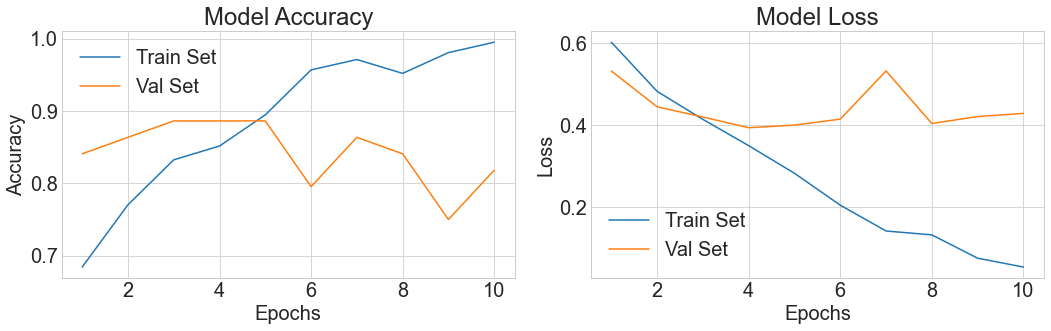

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## Model Prediction

In [28]:
CNN_prediction=model.predict(Imges_Data_Test)

In [29]:
print(CNN_prediction)

[[9.8435366e-01 1.5646277e-02]
 [7.1205169e-01 2.8794837e-01]
 [9.9974912e-01 2.5088427e-04]
 [9.9996173e-01 3.8272301e-05]
 [9.9648643e-01 3.5136233e-03]
 [5.8709496e-01 4.1290501e-01]
 [1.2776369e-01 8.7223631e-01]
 [9.7836339e-01 2.1636646e-02]
 [9.8212355e-01 1.7876454e-02]
 [9.7474217e-01 2.5257835e-02]
 [9.8212355e-01 1.7876454e-02]
 [9.6937960e-01 3.0620383e-02]
 [9.7590905e-01 2.4090948e-02]
 [9.4413346e-01 5.5866521e-02]
 [5.6498879e-01 4.3501124e-01]
 [9.9839336e-01 1.6066266e-03]
 [9.9910396e-01 8.9605356e-04]
 [7.9823054e-02 9.2017692e-01]
 [6.1695401e-02 9.3830454e-01]
 [9.9743241e-01 2.5675406e-03]
 [9.9907756e-01 9.2244119e-04]
 [4.8927912e-01 5.1072085e-01]
 [5.0568927e-02 9.4943106e-01]
 [5.0640643e-01 4.9359363e-01]
 [8.2297802e-02 9.1770226e-01]
 [1.9099977e-02 9.8090005e-01]
 [2.2014296e-02 9.7798574e-01]
 [1.3622874e-02 9.8637718e-01]
 [4.7349241e-03 9.9526513e-01]
 [5.3940429e-03 9.9460596e-01]
 [1.8913785e-02 9.8108619e-01]
 [6.2967372e-01 3.7032628e-01]
 [1.6339

In [30]:
y_predict = []
for i in range(0, len(CNN_prediction)):
    y_predict.append(int(np.argmax(CNN_prediction[i])))
len(y_predict)

44

In [31]:
print(y_predict)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]


In [32]:
y_true = []
for i in range(0, len(Target_Test)):
    y_true.append(int(np.argmax(Target_Test[i])))
len(y_true)

44

In [33]:
print(y_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Result Analysis

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

### Classification Report

In [35]:
print(classification_report(y_true=y_true,y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.86      0.78      0.82        23

    accuracy                           0.82        44
   macro avg       0.82      0.82      0.82        44
weighted avg       0.82      0.82      0.82        44



### Confusion Matrix

In [36]:
labels=["Not_Tumor","Tumor"]

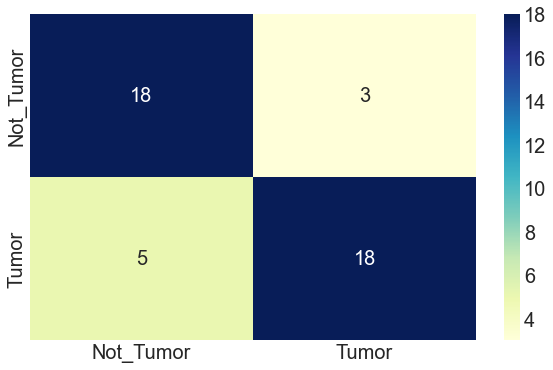

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=y_predict),xticklabels=labels,yticklabels=labels,annot=True,fmt=".4g",cmap="YlGnBu")
plt.show()

## Model Saving

In [38]:
model_json = model.to_json()
with open("model/cnn_model_structure.json", "w") as json_file:
    json_file.write(model_json)

In [39]:
model.save_weights("model/cnn_model_weights.h5")